In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Census ##

In [3]:
census_filename = "nc-est2019-agesex-res.csv"
full = Table.read_table(census_filename) # load in the census table
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


In [4]:
full.num_rows, full.num_columns

(306, 14)

In [5]:
full.labels

('SEX',
 'AGE',
 'CENSUS2010POP',
 'ESTIMATESBASE2010',
 'POPESTIMATE2010',
 'POPESTIMATE2011',
 'POPESTIMATE2012',
 'POPESTIMATE2013',
 'POPESTIMATE2014',
 'POPESTIMATE2015',
 'POPESTIMATE2016',
 'POPESTIMATE2017',
 'POPESTIMATE2018',
 'POPESTIMATE2019')

In [6]:
full.select('POPESTIMATE2015')

POPESTIMATE2015
3983981
3973133
3966321
3974351
4020292
4017589
4017388
4145872
4165033
4130887


In [8]:
full.column('SEX')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2,

In [10]:
full.where('AGE',0)

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
1,0,2014276,2014278,2018474,2028430,2007742,2009723,2024511,2037646,2021375,1991761,1951663,1935117
2,0,1929877,1929882,1932956,1934662,1918828,1921535,1930276,1946335,1933398,1902229,1863680,1847935


In [20]:
# Keep only the columns we care about
# sex, age, estimate from 2010, estimate from 2014
partial = full.select("SEX","AGE","POPESTIMATE2010", "POPESTIMATE2014")
partial

SEX,AGE,POPESTIMATE2010,POPESTIMATE2014
0,0,3951430,3954787
0,1,3957730,3948891
0,2,4090621,3958711
0,3,4111688,4005928
0,4,4077346,4004032
0,5,4064521,4004576
0,6,4072904,4133372
0,7,4042990,4152666
0,8,4025501,4118349
0,9,4125312,4106068


In [21]:
# Make things easier to read by changing the names of the estimate labels
simple = partial.relabeled("POPESTIMATE2010","2010").relabeled("POPESTIMATE2014","2014")
simple

SEX,AGE,2010,2014
0,0,3951430,3954787
0,1,3957730,3948891
0,2,4090621,3958711
0,3,4111688,4005928
0,4,4077346,4004032
0,5,4064521,4004576
0,6,4072904,4133372
0,7,4042990,4152666
0,8,4025501,4118349
0,9,4125312,4106068


<b>warning</b>
relabel works in place, modifies the existing table
relabeled, doesnt work in place, i.e. it does not modiffy the existing table

In [27]:
# Sort by age
simple_sorted = simple.sort('AGE') #.where('AGE', 0)
simple_sorted.show(5)

SEX,AGE,2010,2014
0,0,3951430,3954787
1,0,2018474,2024511
2,0,1932956,1930276
0,1,3957730,3948891
1,1,2020235,2018511


In [34]:
# Sort by age (another way)
simple.sort("AGE", descending=True)

SEX,AGE,2010,2014
0,999,309321666,318301008
1,999,152074758,156654424
2,999,157246908,161646584
0,100,54437,70685
1,100,9357,13577
2,100,45080,57108
0,99,32214,41277
1,99,6116,9032
2,99,26098,32245
0,98,47086,59546


<b> What age, had the most number of people in the 2010 estimate?

In [42]:
largest_age_group = np.max(simple.where("AGE", are.not_equal_to(999)).where("SEX",0).column("2010"))

In [43]:
simple.where("2010",largest_age_group) 

SEX,AGE,2010,2014
0,50,4645689,4479191


the largest age group in the 2010 estimate were 50 year olds

<b>Question:</b> What does `999` mean in age?

In [45]:
simple.sort("AGE", descending=True)

SEX,AGE,2010,2014
0,999,309321666,318301008
1,999,152074758,156654424
2,999,157246908,161646584
0,100,54437,70685
1,100,9357,13577
2,100,45080,57108
0,99,32214,41277
1,99,6116,9032
2,99,26098,32245
0,98,47086,59546


Maybe it reporesents that number of people in that category (across all ages)?

In [47]:
simple.where("SEX",0).column('2010')

array([  3951430,   3957730,   4090621,   4111688,   4077346,   4064521,
         4072904,   4042990,   4025501,   4125312,   4186957,   4115415,
         4113230,   4119537,   4145467,   4230851,   4313036,   4376130,
         4490335,   4570747,   4567951,   4387413,   4286330,   4216524,
         4243080,   4288870,   4160319,   4236631,   4247132,   4209925,
         4303827,   4042153,   3967147,   3933076,   3821734,   3947854,
         3829703,   3896217,   4079655,   4323834,   4386825,   4162937,
         4082210,   4093285,   4177952,   4438000,   4529194,   4534994,
         4534165,   4598583,   4645689,   4498526,   4480160,   4439014,
         4288067,   4258545,   4092793,   3946199,   3802133,   3693990,
         3616436,   3519888,   3494867,   3651970,   2705897,   2678332,
         2621200,   2693584,   2359713,   2167750,   2062466,   1953486,
         1883725,   1750237,   1685936,   1631850,   1481687,   1449156,
         1402199,   1354926,   1319723,   1212519, 

In [49]:
counts_0s_2010 = simple.where("SEX",0).column('2010')

In [51]:
counts_0s_2010.sum() - counts_0s_2010.item(-1) == counts_0s_2010.item(-1)

True

Indeed, `999` represents that sum of all similar individuals

In [56]:
simple.where("AGE",0).column("2010").sum()

7902860

In [62]:
simple.where("AGE",0).where("SEX",0).column("2010").item(0)

3951430

In [63]:
simple.where("AGE",0).column("2010").sum() / 2

3951430.0

# Column Arithmetic 

Difference between 14 estimate and 10 estimate

In [85]:
estimate_2014 = simple.column("2014")#simple_sorted.column('2014') 
estimate_2010 = simple.column("2010")#simple_sorted.column('2010')
estimate_2014 - estimate_2010

array([   3357,   -8839, -131910, -105760,  -73314,  -59945,   60468,
        109676,   92848,  -19244,  -72399,  -30958,  -46043,   48558,
         85886,  -68023, -147111, -194190, -268991, -249958, -157041,
         92853,  317785,  475771,  443273,  212376,  236846,   88165,
         98115,  172265,  -56880,  272298,  347060,  335145,  532250,
        136311,  174715,   68222, -230799, -354497, -541000, -257140,
          1614,  225980,  197498, -290468, -466939, -466409, -388368,
       -201514, -166498,  -22245,  -12436,   84231,  275186,  151898,
        291659,  389709,  378718,  451891,  359969,  305813,  182541,
        -87373,  775892,  698338,  719449,  786520,  207798,  362710,
        398960,  562906,  307917,  249865,  202205,  140582,  211273,
        106815,   78536,   59084,  -56183,    3115,   -5262,    7828,
         47604,    7556,   31247,   46460,   35783,   50703,   61864,
         80279,   63563,   65450,   46109,   24797,   23168,   13982,
         12460,    9

## Make new table with change

In [86]:
# store the difference in array assigned to the name `changed`
difference_in_estamtes = estimate_2014 - estimate_2010

#### addthe change as a column to a table

In [87]:
partial_census_change = simple.with_columns("change", difference_in_estamtes)

partial_census_change

SEX,AGE,2010,2014,change
0,0,3951430,3954787,3357
0,1,3957730,3948891,-8839
0,2,4090621,3958711,-131910
0,3,4111688,4005928,-105760
0,4,4077346,4004032,-73314
0,5,4064521,4004576,-59945
0,6,4072904,4133372,60468
0,7,4042990,4152666,109676
0,8,4025501,4118349,92848
0,9,4125312,4106068,-19244


### Reformatter

In [88]:
## Reformat these changes
# NumberFormatter, PercentFormatter
# set_format

partial_census_change.set_format("2010", NumberFormatter)


SEX,AGE,2010,2014,change
0,0,"3,951,430",3954787,3357
0,1,"3,957,730",3948891,-8839
0,2,"4,090,621",3958711,-131910
0,3,"4,111,688",4005928,-105760
0,4,"4,077,346",4004032,-73314
0,5,"4,064,521",4004576,-59945
0,6,"4,072,904",4133372,60468
0,7,"4,042,990",4152666,109676
0,8,"4,025,501",4118349,92848
0,9,"4,125,312",4106068,-19244


In [89]:
partial_census_change

SEX,AGE,2010,2014,change
0,0,"3,951,430",3954787,3357
0,1,"3,957,730",3948891,-8839
0,2,"4,090,621",3958711,-131910
0,3,"4,111,688",4005928,-105760
0,4,"4,077,346",4004032,-73314
0,5,"4,064,521",4004576,-59945
0,6,"4,072,904",4133372,60468
0,7,"4,042,990",4152666,109676
0,8,"4,025,501",4118349,92848
0,9,"4,125,312",4106068,-19244


In [90]:
partial_census_change.set_format("2014", NumberFormatter)

SEX,AGE,2010,2014,change
0,0,"3,951,430","3,954,787",3357
0,1,"3,957,730","3,948,891",-8839
0,2,"4,090,621","3,958,711",-131910
0,3,"4,111,688","4,005,928",-105760
0,4,"4,077,346","4,004,032",-73314
0,5,"4,064,521","4,004,576",-59945
0,6,"4,072,904","4,133,372",60468
0,7,"4,042,990","4,152,666",109676
0,8,"4,025,501","4,118,349",92848
0,9,"4,125,312","4,106,068",-19244


In [91]:
partial_census_change.set_format("2014", PercentFormatter)

SEX,AGE,2010,2014,change
0,0,"3,951,430",395478700.00%,3357
0,1,"3,957,730",394889100.00%,-8839
0,2,"4,090,621",395871100.00%,-131910
0,3,"4,111,688",400592800.00%,-105760
0,4,"4,077,346",400403200.00%,-73314
0,5,"4,064,521",400457600.00%,-59945
0,6,"4,072,904",413337200.00%,60468
0,7,"4,042,990",415266600.00%,109676
0,8,"4,025,501",411834900.00%,92848
0,9,"4,125,312",410606800.00%,-19244


In [92]:
partial_census_change.set_format("2014", NumberFormatter)

SEX,AGE,2010,2014,change
0,0,"3,951,430","3,954,787",3357
0,1,"3,957,730","3,948,891",-8839
0,2,"4,090,621","3,958,711",-131910
0,3,"4,111,688","4,005,928",-105760
0,4,"4,077,346","4,004,032",-73314
0,5,"4,064,521","4,004,576",-59945
0,6,"4,072,904","4,133,372",60468
0,7,"4,042,990","4,152,666",109676
0,8,"4,025,501","4,118,349",92848
0,9,"4,125,312","4,106,068",-19244


### Interpretting these changes

**Are these changes meaningful?**

In [93]:
a = 5
b = 10
change = b - a
change

5

In [94]:
change / a * 100

100.0

In [95]:
 # Convert changes to percentages
    # a = 5
    # b = 10
    # change = second - first
    # change/initial 
#partial_census_change_clean 
a = 5
b= 10
(b - a) / a * 100

100.0

#### Let's add the eprcent change to the table

In [96]:
partial_census_change

SEX,AGE,2010,2014,change
0,0,"3,951,430","3,954,787",3357
0,1,"3,957,730","3,948,891",-8839
0,2,"4,090,621","3,958,711",-131910
0,3,"4,111,688","4,005,928",-105760
0,4,"4,077,346","4,004,032",-73314
0,5,"4,064,521","4,004,576",-59945
0,6,"4,072,904","4,133,372",60468
0,7,"4,042,990","4,152,666",109676
0,8,"4,025,501","4,118,349",92848
0,9,"4,125,312","4,106,068",-19244


In [104]:
percent_change = (partial_census_change.column("change") / partial_census_change.column("2010")) * 100
percent_change

array([  8.49565853e-02,  -2.23335094e-01,  -3.22469376e+00,
        -2.57217960e+00,  -1.79808140e+00,  -1.47483553e+00,
         1.48464093e+00,   2.71274478e+00,   2.30649551e+00,
        -4.66485929e-01,  -1.72915557e+00,  -7.52244913e-01,
        -1.11938793e+00,   1.17872470e+00,   2.07180518e+00,
        -1.60778529e+00,  -3.41084563e+00,  -4.43748243e+00,
        -5.99044392e+00,  -5.46864659e+00,  -3.43788714e+00,
         2.11634966e+00,   7.41391820e+00,   1.12834885e+01,
         1.04469631e+01,   4.95179383e+00,   5.69297691e+00,
         2.08101673e+00,   2.31014718e+00,   4.09187812e+00,
        -1.32161446e+00,   6.73645951e+00,   8.74835241e+00,
         8.52119308e+00,   1.39269243e+01,   3.45278726e+00,
         4.56210312e+00,   1.75098050e+00,  -5.65731661e+00,
        -8.19867275e+00,  -1.23323816e+01,  -6.17688906e+00,
         3.95374074e-02,   5.52074923e+00,   4.72714861e+00,
        -6.54502028e+00,  -1.03095385e+01,  -1.02846663e+01,
        -8.56536981e+00,

In [105]:
tbl_with_percent_change = partial_census_change.with_column("percent change", percent_change)
tbl_with_percent_change

SEX,AGE,2010,2014,change,percent change
0,0,"3,951,430","3,954,787",3357,0.0849566
0,1,"3,957,730","3,948,891",-8839,-0.223335
0,2,"4,090,621","3,958,711",-131910,-3.22469
0,3,"4,111,688","4,005,928",-105760,-2.57218
0,4,"4,077,346","4,004,032",-73314,-1.79808
0,5,"4,064,521","4,004,576",-59945,-1.47484
0,6,"4,072,904","4,133,372",60468,1.48464
0,7,"4,042,990","4,152,666",109676,2.71274
0,8,"4,025,501","4,118,349",92848,2.3065
0,9,"4,125,312","4,106,068",-19244,-0.466486


In [106]:
tbl_with_percent_change.set_format("percent change", PercentFormatter)

SEX,AGE,2010,2014,change,percent change
0,0,"3,951,430","3,954,787",3357,8.50%
0,1,"3,957,730","3,948,891",-8839,-22.33%
0,2,"4,090,621","3,958,711",-131910,-322.47%
0,3,"4,111,688","4,005,928",-105760,-257.22%
0,4,"4,077,346","4,004,032",-73314,-179.81%
0,5,"4,064,521","4,004,576",-59945,-147.48%
0,6,"4,072,904","4,133,372",60468,148.46%
0,7,"4,042,990","4,152,666",109676,271.27%
0,8,"4,025,501","4,118,349",92848,230.65%
0,9,"4,125,312","4,106,068",-19244,-46.65%


lets find the percent change across the entire population?

In [107]:
tbl_with_percent_change.where("AGE",999).where("SEX", 0)

SEX,AGE,2010,2014,change,percent change
0,999,"309,321,666","318,301,008",8979342,290.29%


# Analyzing the results/table

In [108]:
# find the age with the largest percentage change (ignoring gender)

In [109]:
tbl_with_percent_change.where("SEX", 0).sort("percent change")

SEX,AGE,2010,2014,change,percent change
0,40,"4,386,825","3,845,825",-541000,-1233.24%
0,46,"4,529,194","4,062,255",-466939,-1030.95%
0,47,"4,534,994","4,068,585",-466409,-1028.47%
0,48,"4,534,165","4,145,797",-388368,-856.54%
0,39,"4,323,834","3,969,337",-354497,-819.87%
0,45,"4,438,000","4,147,532",-290468,-654.50%
0,41,"4,162,937","3,905,797",-257140,-617.69%
0,18,"4,490,335","4,221,344",-268991,-599.04%
0,38,"4,079,655","3,848,856",-230799,-565.73%
0,19,"4,570,747","4,320,789",-249958,-546.86%


In [110]:
tbl_with_percent_change.column('2014') - tbl_with_percent_change.column("2010") == tbl_with_percent_change.column("change") 

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [ ]:
# add anual growth based on total growth

(back to slides)
## Line Plots ##

In [111]:
# Remove the age totals

no_999 = tbl_with_percent_change.where("AGE",are.not_equal_to(999)) #

In [112]:
# Look at the largest age and include everything below it

In [113]:
# Remove male and female (keep only combined)
everyone = no_999.where('SEX', 0).drop('SEX')
everyone

AGE,2010,2014,change,percent change
0,"3,951,430","3,954,787",3357,8.50%
1,"3,957,730","3,948,891",-8839,-22.33%
2,"4,090,621","3,958,711",-131910,-322.47%
3,"4,111,688","4,005,928",-105760,-257.22%
4,"4,077,346","4,004,032",-73314,-179.81%
5,"4,064,521","4,004,576",-59945,-147.48%
6,"4,072,904","4,133,372",60468,148.46%
7,"4,042,990","4,152,666",109676,271.27%
8,"4,025,501","4,118,349",92848,230.65%
9,"4,125,312","4,106,068",-19244,-46.65%


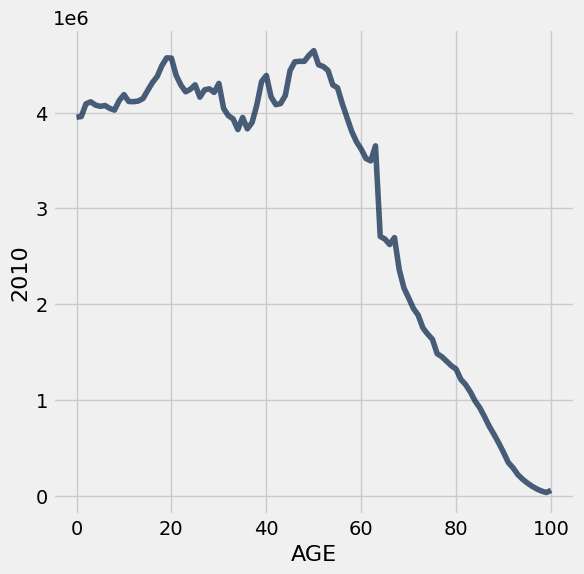

In [114]:
# Lets plot the number of ages during 2010
# Make Age the X-axis and 2010 the y-axis
everyone.plot('AGE', '2010')

In [ ]:
# ^^ That plot should be labeled! Here are 3 ways to label it:

In [ ]:
# add a python comment

In [ ]:
# print out what the tables is

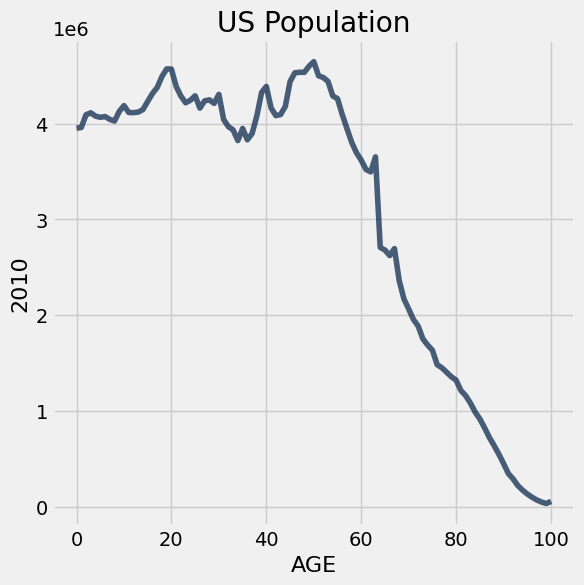

In [115]:
# Add a title to plots
everyone.plot('AGE', '2010')
plots.title('US Population');    # <--- OPTIONAL; not needed for COMS1016

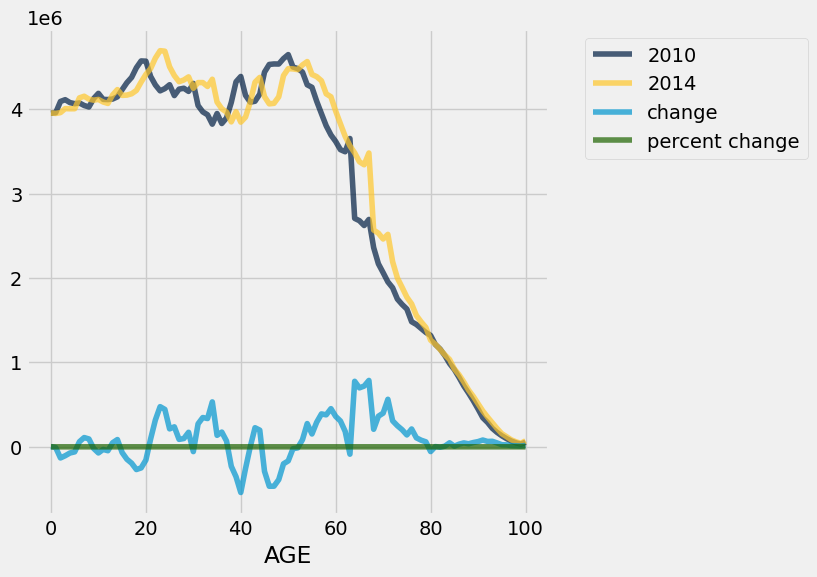

In [116]:
# Age distribution for two different years
# hint just plot AGE
everyone.plot('AGE')

## Males and Females in 2014 ##


In [122]:
# Let's compare male and female counts per age
# no_999 "SEX" codes males as 1 and females as 2
# Get rid of SEX column
males = no_999.where("SEX",1).drop("SEX").drop("percent change", "change")
females = no_999.where("SEX",2).drop("SEX").drop("percent change").drop("change")

In [123]:
males

AGE,2010,2014
0,"2,018,474","2,024,511"
1,"2,020,235","2,018,511"
2,"2,088,545","2,023,752"
3,"2,101,149","2,049,250"
4,"2,084,214","2,043,524"
5,"2,076,481","2,042,790"
6,"2,079,365","2,109,355"
7,"2,063,100","2,121,426"
8,"2,054,386","2,104,331"
9,"2,106,966","2,096,379"


In [124]:
# Make a new Table pop_2014 where the columns are:
# Age
# Males: number of males in 2014
# Females: number of females in 2014
pop_2014 = Table().with_columns(
    'Age', males.column("AGE"),
    'Males', males.column("2014"),
    'Females', females.column("2014")
)
pop_2014

Age,Males,Females
0,2024511,1930276
1,2018511,1930380
2,2023752,1934959
3,2049250,1956678
4,2043524,1960508
5,2042790,1961786
6,2109355,2024017
7,2121426,2031240
8,2104331,2014018
9,2096379,2009689


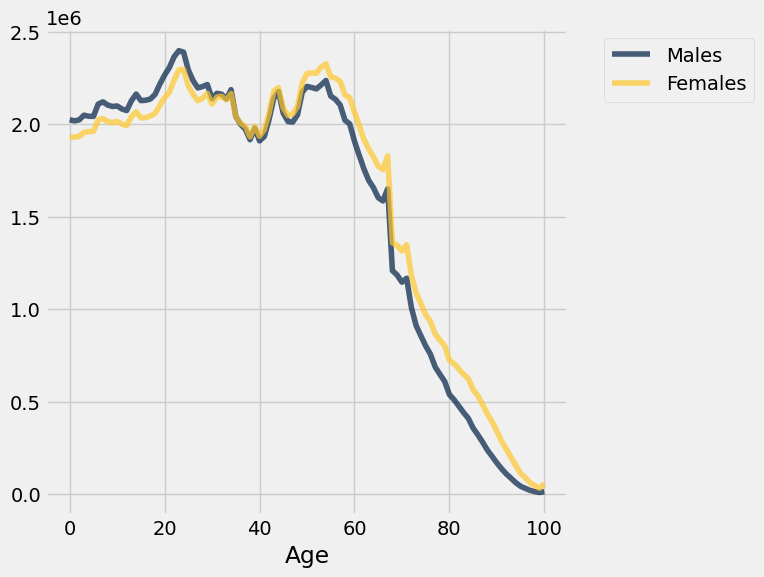

In [125]:
pop_2014.plot('Age')

In [126]:
# Calculate the percent female for each age
total = pop_2014.column('Males') + pop_2014.column('Females')
pct_female = pop_2014.column('Females') / total * 100
pct_female

array([ 48.80859576,  48.88410442,  48.87851121,  48.84456236,
        48.96334495,  48.98860703,  48.96769514,  48.91411927,
        48.90352906,  48.94436721,  48.98494565,  49.00577972,
        48.99954194,  48.96241568,  48.87023134,  48.88078489,
        48.87267534,  48.9071101 ,  48.78249676,  48.66956012,
        48.61733747,  48.50694133,  48.63247334,  48.89294045,
        49.00736244,  49.05512829,  49.14382335,  49.20313004,
        49.27853353,  49.45102791,  49.66292257,  49.76463981,
        49.86360182,  49.95034231,  49.76336615,  49.99597225,
        50.05821071,  50.21098824,  50.20003346,  50.11524595,
        50.32384469,  50.48260317,  50.40981198,  50.43733135,
        50.23933538,  50.33931022,  50.39442379,  50.54580401,
        50.52210709,  50.57373446,  50.77624509,  50.88250715,
        50.94719369,  51.06955294,  50.97762495,  51.19274866,
        51.3054311 ,  51.47247128,  51.6309957 ,  51.71241046,
        51.98597728,  52.10668581,  52.1758804 ,  52.39

In [127]:
# Round it to 3 so that it's easier to read
pct_female = np.round(pct_female, 3)
pct_female

array([ 48.809,  48.884,  48.879,  48.845,  48.963,  48.989,  48.968,
        48.914,  48.904,  48.944,  48.985,  49.006,  49.   ,  48.962,
        48.87 ,  48.881,  48.873,  48.907,  48.782,  48.67 ,  48.617,
        48.507,  48.632,  48.893,  49.007,  49.055,  49.144,  49.203,
        49.279,  49.451,  49.663,  49.765,  49.864,  49.95 ,  49.763,
        49.996,  50.058,  50.211,  50.2  ,  50.115,  50.324,  50.483,
        50.41 ,  50.437,  50.239,  50.339,  50.394,  50.546,  50.522,
        50.574,  50.776,  50.883,  50.947,  51.07 ,  50.978,  51.193,
        51.305,  51.472,  51.631,  51.712,  51.986,  52.107,  52.176,
        52.394,  52.396,  52.512,  52.531,  52.565,  52.916,  53.174,
        53.426,  53.609,  53.951,  54.417,  54.653,  54.739,  55.262,
        55.722,  56.204,  56.845,  57.315,  58.009,  58.705,  59.493,
        60.388,  61.239,  62.336,  63.306,  64.468,  65.729,  66.782,
        67.626,  68.942,  69.854,  71.435,  72.552,  73.976,  75.236,
        77.061,  78.

In [129]:
# Add female percent to our table.
# Ad a column names percent female
pop_2014 = pop_2014.with_column("Percent female", pct_female)
pop_2014

Age,Males,Females,Percent female
0,2024511,1930276,48.809
1,2018511,1930380,48.884
2,2023752,1934959,48.879
3,2049250,1956678,48.845
4,2043524,1960508,48.963
5,2042790,1961786,48.989
6,2109355,2024017,48.968
7,2121426,2031240,48.914
8,2104331,2014018,48.904
9,2096379,2009689,48.944


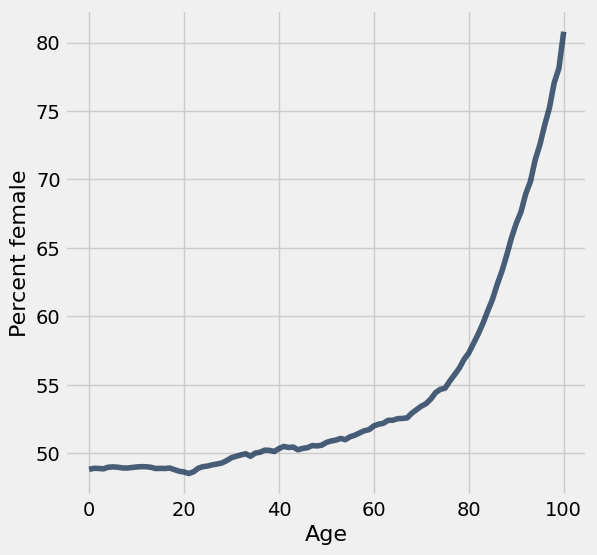

In [130]:
pop_2014.plot('Age', 'Percent female')

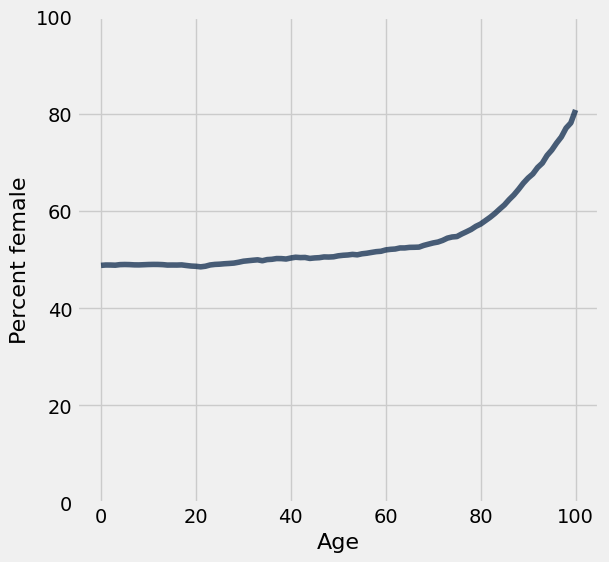

In [131]:
# ^^ Look at the y-axis! Trend is not as dramatic as you might think
pop_2014.plot('Age', 'Percent female')
plots.ylim(0, 100);  # Optional for COMS1016

## Scatter Plots ##

In [ ]:
# Actors and their highest grossing movies
# Read in the table called 'actors.csv'

actors = ...
actors

In [ ]:
actors.scatter('Number of Movies', 'Total Gross')

In [ ]:
actors.scatter('Number of Movies', 'Average per Movie')

In [ ]:
actors.where('Average per Movie', are.above(400))

## Bar Charts ##

In [132]:
# Highest grossing movies as of 2017
# Read in table called 'top_movies_2017.csv'
top_movies = Table.read_table("top_movies_2017.csv")
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [ ]:
top10_adjusted = top_movies.take(np.arange(10))
top10_adjusted

In [ ]:
# Convert Gross (Adjusted) to millions of dollars for readability
millions = ...
top10_adjusted = top10_adjusted.with_column('Millions', millions)
top10_adjusted

In [ ]:
# A line plot doesn't make sense here: don't do this!
top10_adjusted.plot('Year', 'Millions')

# Why not?

In [ ]:
top10_adjusted.barh('Title', 'Millions')